In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### I/O

In [2]:
FIGURE_SAVEPATH = "../../../figures/"
SAVELABEL = "thought_experiment"

SAVE = True

### Formatting

In [3]:
INIT_COLOR = "#2F59B5"
R1_COLOR = "#F71500"
R2_COLOR = "#198915"

LEGEND_FONTSIZE = 15
TITLE_FONTSIZE = 18
TICK_FONTSIZE = 14
SCATTER_ALPHA = 1
SCATTER_SIZE = 20
PLOT_GAP = 0.05

### Run toy analysis

In [4]:
# Old settings
# np.random.seed(42)
# n = 60

np.random.seed(88)
n = 55

In [5]:
def f(x):
    fx_left = x - 1
    fx_right = np.power(np.abs(x + 1), 0.5) - 2
    fx = fx_left * (x <= 0) + fx_right * (x > 0)
    return fx

In [6]:
# Generate x
x = np.random.normal(size=n)
# Force x to not be near boundaries 0 or 1
eps = 0.03
x = np.asarray(x, float)
x = np.where(np.abs(x) < eps, np.where(x>=0, eps, -eps), x)           # away from 0
x = np.where(np.abs(x-1) < eps, 1 - eps*np.sign(1-x), x)              # away from 1
# Calculate conditional mean
fx = f(x)
# Get region indicators for x
r1_indics = (x <= 0)
r2_indics = (x <= 1)
# Generate noise
eps = np.random.normal(size=n)
# Orthogonalize noise on r1_indics so that least squares fit passes through 1
orthog = LinearRegression().fit(x[r1_indics].reshape(-1,1), eps[r1_indics])
r1_eps = eps[r1_indics] - orthog.predict(x[r1_indics].reshape(-1,1))
eps[r1_indics] = r1_eps
# Generate y
y = fx + eps

In [7]:
# Get range of x
viz_grid = np.array([x.min() - PLOT_GAP, x.max() + PLOT_GAP])
y_min, y_max = y.min() - 0.05, y.max() + 0.05

In [8]:
# Fit least squares to region 1 points
x_r1 = x[x <= 0]
y_r1 = y[x <= 0]
linreg = LinearRegression().fit(x_r1.reshape(-1,1), y_r1)
preds_r1 = linreg.predict(viz_grid.reshape(-1,1))

# Confirm that intersection with y-axis is at x = 1
print("f_hat(1) = ", linreg.predict([[1]]))

f_hat(1) =  [-4.4408921e-16]


In [9]:
# Fit least squares to region 2 points
x_r2 = x[x <= 1]
y_r2 = y[x <= 1]
linreg = LinearRegression().fit(x_r2.reshape(-1,1), y_r2)
preds_r2 = linreg.predict(viz_grid.reshape(-1,1))

### Visualize

In [10]:
# matplotlib.rc('hatch', linewidth=3)

# fig, ax = plt.subplots(1,2,figsize=(12.5,5))

# # -------------------------- Region 1 -------------------------- #
# ax[0].scatter(x_r1, y_r1, s=SCATTER_SIZE, color=INIT_COLOR, alpha=SCATTER_ALPHA)
# ax[0].plot(viz_grid, preds_r1, color=INIT_COLOR, linewidth=2.5)

# ax[0].fill_between([0, viz_grid[1]], [y_min, y_min], [y_max, y_max], alpha=0.5,
#                    color=R1_COLOR, label=r"$\mathcal{R}$" + " (current)")
# ax[0].fill_between([1, viz_grid[1]], [y_min, y_min], [y_max, y_max], alpha=1,
#                    color=R2_COLOR, hatch=r"\\", facecolor="none",
#                    label=r"$\tilde{\mathcal{R}}$" + " (proposed)")

# ax[0].axhline(y=0, color='k', alpha=1, linestyle="-", linewidth=1)
# ax[0].axvline(x=0, color='k', alpha=1, linestyle="-", linewidth=1)
# ax[0].set_xlim(viz_grid[0], viz_grid[1])
# ax[0].set_ylim(y_min, y_max)
# ax[0].spines[['right', 'top']].set_visible(False)

# ax[0].legend(loc="upper left", fontsize=LEGEND_FONTSIZE)
# ax[0].set_title("Before Chiseling", fontsize=TITLE_FONTSIZE)
# ax[0].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

# # -------------------------- Region 2 -------------------------- #

# ax[1].scatter(x[r1_indics], y[r1_indics], s=SCATTER_SIZE, color=INIT_COLOR, alpha=SCATTER_ALPHA)
# ax[1].scatter(x[r2_indics & ~ r1_indics], y[r2_indics & ~r1_indics], s=SCATTER_SIZE,
#               color=R1_COLOR, alpha=SCATTER_ALPHA)
# ax[1].plot(viz_grid, preds_r1, color=INIT_COLOR, linestyle="-", linewidth=2.5)
# # ax[1].plot(viz_grid, preds_r2, color=R1_COLOR, linewidth=2.5)

# ax[1].fill_between([1, viz_grid[1]], [y_min, y_min], [y_max, y_max], alpha=0.5,
#                    color=R2_COLOR, label=r"$\tilde{\mathcal{R}}$" + " (current)")

# ax[1].axhline(y=0, color='k', alpha=1, linestyle="-", linewidth=1)
# ax[1].axvline(x=0, color='k', alpha=1, linestyle="-", linewidth=1)
# ax[1].set_xlim(viz_grid[0], viz_grid[1])

# ax[1].set_ylim(y_min, y_max)
# ax[1].spines[['right', 'top']].set_visible(False)

# ax[1].legend(loc="upper left", fontsize=LEGEND_FONTSIZE)
# ax[1].set_title("After Chiseling", fontsize=TITLE_FONTSIZE)
# ax[1].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

# plt.tight_layout()

# # Save
# if SAVE:
#     plt.savefig(FIGURE_SAVEPATH + "{}.pdf".format(SAVELABEL), bbox_inches="tight", dpi=300)

# plt.show()

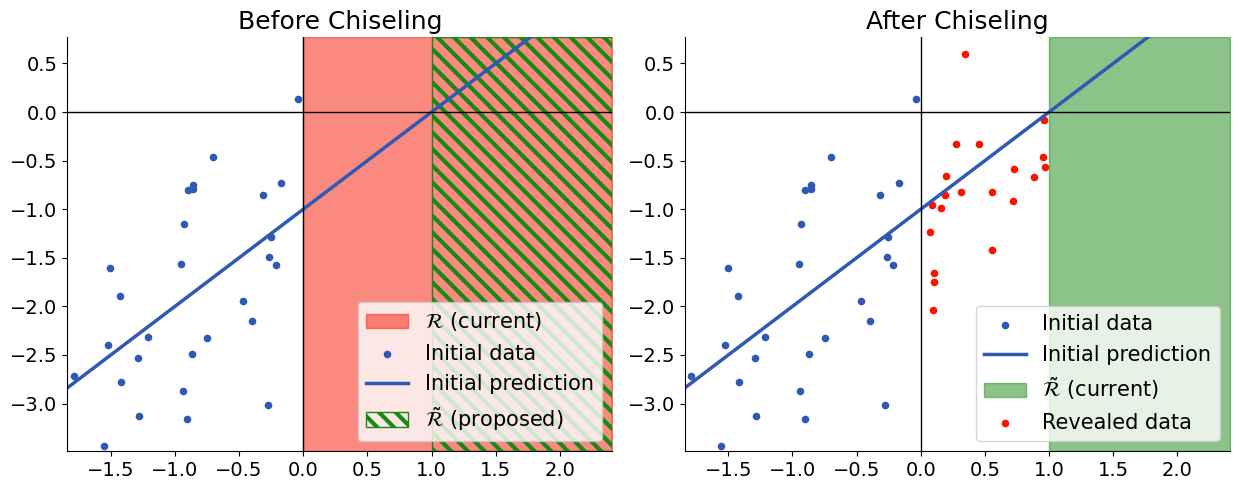

In [11]:
matplotlib.rc('hatch', linewidth=3)

fig, ax = plt.subplots(1,2,figsize=(12.5,5))

# -------------------------- Region 1 -------------------------- #
ax[0].scatter(x_r1, y_r1, s=SCATTER_SIZE, color=INIT_COLOR, alpha=SCATTER_ALPHA, label="Initial data")
ax[0].plot(viz_grid, preds_r1, color=INIT_COLOR, linewidth=2.5, label="Initial prediction")

ax[0].fill_between([0, viz_grid[1]], [y_min, y_min], [y_max, y_max], alpha=0.5,
                   color=R1_COLOR, label=r"$\mathcal{R}$" + " (current)")
ax[0].fill_between([1, viz_grid[1]], [y_min, y_min], [y_max, y_max], alpha=1,
                   color=R2_COLOR, hatch=r"\\", facecolor="none",
                   label=r"$\tilde{\mathcal{R}}$" + " (proposed)")

ax[0].axhline(y=0, color='k', alpha=1, linestyle="-", linewidth=1)
ax[0].axvline(x=0, color='k', alpha=1, linestyle="-", linewidth=1)
ax[0].set_xlim(viz_grid[0], viz_grid[1])
ax[0].set_ylim(y_min, y_max)
ax[0].spines[['right', 'top']].set_visible(False)

ax[0].legend(loc="lower right", fontsize=LEGEND_FONTSIZE)
ax[0].set_title("Before Chiseling", fontsize=TITLE_FONTSIZE)
ax[0].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

# Reorder legend elements
handles, labels = ax[0].get_legend_handles_labels()
order = [2, 0, 1, 3]
ax[0].legend([handles[i] for i in order],
             [labels[i]  for i in order],
             loc="lower right",
             fontsize=LEGEND_FONTSIZE)

# -------------------------- Region 2 -------------------------- #

ax[1].scatter(x[r1_indics], y[r1_indics], s=SCATTER_SIZE, color=INIT_COLOR, alpha=SCATTER_ALPHA, label="Initial data")
ax[1].scatter(x[r2_indics & ~ r1_indics], y[r2_indics & ~r1_indics], s=SCATTER_SIZE,
              color=R1_COLOR, alpha=SCATTER_ALPHA, label="Revealed data")
ax[1].plot(viz_grid, preds_r1, color=INIT_COLOR, linestyle="-", linewidth=2.5, label="Initial prediction")
# ax[1].plot(viz_grid, preds_r2, color=R1_COLOR, linewidth=2.5)

ax[1].fill_between([1, viz_grid[1]], [y_min, y_min], [y_max, y_max], alpha=0.5,
                   color=R2_COLOR, label=r"$\tilde{\mathcal{R}}$" + " (current)")

ax[1].axhline(y=0, color='k', alpha=1, linestyle="-", linewidth=1)
ax[1].axvline(x=0, color='k', alpha=1, linestyle="-", linewidth=1)
ax[1].set_xlim(viz_grid[0], viz_grid[1])

ax[1].set_ylim(y_min, y_max)
ax[1].spines[['right', 'top']].set_visible(False)

ax[1].legend(loc="lower right", fontsize=LEGEND_FONTSIZE)
ax[1].set_title("After Chiseling", fontsize=TITLE_FONTSIZE)
ax[1].tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

# Reorder legend elements
handles, labels = ax[1].get_legend_handles_labels()
order = [0, 2, 3, 1]
ax[1].legend([handles[i] for i in order],
             [labels[i]  for i in order],
             loc="lower right",
             fontsize=LEGEND_FONTSIZE)

plt.tight_layout()

# Save
if SAVE:
    plt.savefig(FIGURE_SAVEPATH + "{}.pdf".format(SAVELABEL), bbox_inches="tight", dpi=300)

plt.show()